# Naive Bayes model

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more.

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [ ]:
# Import relevant libraries and modules.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

# for Naive Bayes
from sklearn import naive_bayes, model_selection
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [ ]:
# Display the first 10 rows of data.

### YOUR CODE HERE ###
print(extracted_data.head())


     fg    3p    ft  reb  ast  stl  blk  tov  target_5yrs  total_points  \
0  34.7  25.0  69.9  4.1  1.9  0.4  0.4  1.3            0         266.4   
1  29.6  23.5  76.5  2.4  3.7  1.1  0.5  1.6            0         252.0   
2  42.2  24.4  67.0  2.2  1.0  0.5  0.3  1.0            0         384.8   
3  42.6  22.6  68.9  1.9  0.8  0.6  0.1  1.0            1         330.6   
4  52.4   0.0  67.4  2.5  0.3  0.3  0.4  0.8            1         216.0   

   efficiency  
0    0.270073  
1    0.267658  
2    0.339869  
3    0.491379  
4    0.391304  


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [ ]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = extracted_data[['target_5yrs']]

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = extracted_data.copy()
X = extracted_data.drop(columns=['target_5yrs'])


### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [ ]:
# Display the first 10 rows of your target data.
print(y.head(10))


   target_5yrs
0            0
1            0
2            0
3            1
4            1
5            0
6            1
7            1
8            0
9            0


**Question:** What do you observe about the your target variable?


It is boolean, 0 or 1.

In [ ]:
# Display the first 10 rows of your predictor variables.
print(X.head(10))

     fg    3p    ft  reb  ast  stl  blk  tov  total_points  efficiency
0  34.7  25.0  69.9  4.1  1.9  0.4  0.4  1.3         266.4    0.270073
1  29.6  23.5  76.5  2.4  3.7  1.1  0.5  1.6         252.0    0.267658
2  42.2  24.4  67.0  2.2  1.0  0.5  0.3  1.0         384.8    0.339869
3  42.6  22.6  68.9  1.9  0.8  0.6  0.1  1.0         330.6    0.491379
4  52.4   0.0  67.4  2.5  0.3  0.3  0.4  0.8         216.0    0.391304
5  42.3  32.5  73.2  0.8  1.8  0.4  0.0  0.7         277.5    0.324561
6  43.5  50.0  81.1  2.0  0.6  0.2  0.1  0.7         409.2    0.605505
7  41.5  30.0  87.5  1.7  0.2  0.2  0.1  0.7         273.6    0.553398
8  39.2  23.3  71.4  0.8  2.3  0.3  0.0  1.1         156.0    0.242424
9  38.3  21.4  67.8  1.1  0.3  0.2  0.0  0.7         155.4    0.435294


**Question:** What do you observe about the your predictor variables?

All variables are continuous.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [ ]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



### Print the shape of each output

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [ ]:
# Print the shape of X_train.
print("X_train:", X_train.shape)

# Print the shape of X_test.
print("X_test:", X_test.shape)

# Print the shape of y_train.
print("y_train:", y_train.shape)

# Print the shape of y_test.
print("y_test:", y_test.shape)


X_train: (1005, 10)
X_test: (335, 10)
y_train: (1005, 1)
y_test: (335, 1)


**Question:** How many rows are in each of the outputs?


In [ ]:
X_train: 1005
X_test: 335
y_train: 1005
y_test: 335

**Question:** What was the effect of the train-test split?


It separated data into training and testing sets.

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

GaussianNB because all of independent variables are continuous.

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [ ]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
nb = naive_bayes.GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply model to predict on your test data. Call this "y_pred".
y_preds = nb.predict(X_test)


## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [ ]:
# Print your accuracy score.
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))

# Print your precision score.
print('Precision:', '%.3f' % precision_score(y_test, y_preds))

# Print your recall score.
print('Recall:', '%.3f' % recall_score(y_test, y_preds))

# Print your f1 score.
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))


Accuracy: 0.654
Precision: 0.838
Recall: 0.548
F1 Score: 0.663


**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



Accuracy: 0.654 the proportion predictions that were correct, both positive and negative. This is not a great score.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


No.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


Precision: 0.838
Recall: 0.548
Precision was much better than recall. Precision measures the proportion of positive predictions that are correct to all positive predictions. Recall measures the proportion of data points that are predicted as True, out of all the data points that are actually True.

**Question:** What is the F1 score of your model, and what does this score mean?

F1 Score: 0.663 F1 score is a measurement that combines both precision and recall into a single expression, giving each equal importance.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

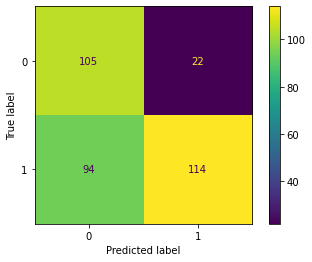

In [ ]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = confusion_matrix(y_test, y_preds, labels=nb.classes_)

# Create the display for your confusion matrix.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_,)

# Plot the visual in-line.
disp.plot(values_format='') # values_format='' suppresses scientific notation
plt.show()


**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


There were more false negatives than false positives.

## Considerations

**What are some key takeaways that you learned from this lab?**

How to create a naive bayes model, make predictions, and evaluate the model.

**How would you present your results to your team?**

Present the evaluation metrics and confusion matrix.

**How would you summarize your findings to stakeholders?**

I think the model additional work. While it is pretty good at predicting positive longevity of NBA players, it also predicts a lot of false positives. The F1 score suggests it should be improved before making important business decisions based on it.
